In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.manifold import TSNE

In [33]:
data1 = pd.read_table('menuitems.normalized', " [+] ", engine = 'python', header = None)

In [34]:
data2 = data1.drop(5, axis=1)
data2[4] = data2[4].astype(str)
data2 = data2.groupby([0,3])[4].apply(lambda x: ' '.join(x)).reset_index()
#data3 = data2.groupby([0,3])[4].apply(lambda x: ' '.join(x)).reset_index()

In [35]:
data1.head()

0       1             2   3  \
0  Tiffin Etc.  indian  philadelphia  $$   
1  Tiffin Etc.  indian  philadelphia  $$   
2  Tiffin Etc.  indian  philadelphia  $$   
3  Tiffin Etc.  indian  philadelphia  $$   
4  Tiffin Etc.  indian  philadelphia  $$   

                                                   4    5  
0  aloo paratha mashed potatoes flavored with tan...  3.5  
1  paneer do pyaza roll homemade cottage cheese a...  8.0  
2  masala aloo roll pan fried spiced potatoes and...  5.5  
3  bhuna chicken roll tender fire roasted chicken...  6.5  
4  murg tikka roll tandoori chicken kebabs with c...  6.5

In [36]:
data3 = data2.drop(4, axis = 1)
data3.head()

0   3
0    #1 Chop Suey   $
1        'Inoteca  $$
2            'ino  $$
3          'sNice   $
4  1 Fish, 2 Fish   $

In [37]:
data4 = data2.drop(3, axis=1)
data4.head()

0                                                  4
0    #1 Chop Suey  pork noodle soup large ham small extra onion h...
1        'Inoteca  soppressata mortadella coppa speck cioccolata ...
2            'ino  egg fontina bruschetta egg fontina bruschetta ...
3          'sNice  brie pear and arugula with raspberry mustard h...
4  1 Fish, 2 Fish  sushi sashimi combo hunan shrimp shrimp with s...

In [38]:
#data2.head()
#data2.loc[[0],[4]]
data_dict = data4 #.drop([1,2,3], axis=1)
data_dict.head()
data_dict2 = data_dict.set_index(0)[4].to_dict()

In [39]:
data_dict2.itervalues().next()
# data_dict2

{'Blue Duck Tavern': 'chilled corn soup with cilantro royale shellfish emulsion salad of heirloom tomato sheep s milk ricotta baby coconut solera vinegar carpaccio of octopus artichoke vinaigrette sardines on toast avocado black olive basil roasted maine scallops english oeas hazelnut and brown butter braised escolar fried green tomatoes minestrone broth toasted alaskan spot prawns tater tots whole roasted fish of the day galantine of guinea hen macerated peaches oven roasted bone marrow vandouvan crust foie gras candy bar macadamia cocoa butter chocolate orchid fruit braised beef rib homemade steak sauce roasted day aged strip loin of beef forestiere sauce roasted all natural chicken leg fricassee muscovy duck breast spicy duck meatballs gumbo jus pan grilled house made half smoke sausage walla walla onion condiment summer vegetable tart tomato fondue fregola sarda with cabra la mancha cheese and shelling beans wood oven roasted fingerlings with pickled radishes potato puree with fres

In [40]:
v = TfidfVectorizer(stop_words = 'english')
x = v.fit_transform(data_dict2.values())

In [41]:
x.shape

(5917, 47643)

In [42]:
#http://stackoverflow.com/questions/36587702/convert-sparse-matrix-csc-matrix-to-pandas-dataframe
#Give me a dataframe with all restaurants as observations
#this is what you will use for PCA plotting
dense_df1 = pd.DataFrame(x.toarray())
#dense_df1.head()

In [43]:
dense_df1.shape

(5917, 47643)

In [44]:
#add csv file of top50 words into this notebook, make into list
top_50list = pd.read_csv("top_50list.csv", sep=",")
top_50list.columns = ['index', 'word']
top_50index = top_50list["index"].tolist()

In [45]:
#using dense_df1, use only top_50list as features 
PCA_data = dense_df1[top_50index]
PCA_data.head()

2945  2180  2821  3078  2497  2568  1802  2060  2445  1807  ...   1467  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

   2277  2534  2537  748   2643  1908  1781  2089  894   
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 50 columns]

In [46]:
PCA_object = PCA(n_components=2)
PCA_object2 = pd.DataFrame(PCA_object.fit(PCA_data).transform(PCA_data), columns = ['x', 'y'])
#PCA_object2.columns

In [49]:
#PCA_dollar = pd.merge(PCA_object2, data3, how='outer', )
PCA_dollar = pd.concat([PCA_object2, data3], axis=1)
PCA_dollar.columns = ['x','y','name','price']
PCA_dollar.head()

x         y            name price
0 -0.011560 -0.000173    #1 Chop Suey     $
1  0.025072 -0.000495        'Inoteca    $$
2 -0.011560 -0.000173            'ino    $$
3 -0.011560 -0.000173          'sNice     $
4 -0.011560 -0.000173  1 Fish, 2 Fish     $

In [60]:
# PCA_dollar2 = PCA_dollar
# PCA_dollar2.loc[PCA_dollar2[3] == '$', 3] = 0.1
# PCA_dollar2.loc[PCA_dollar2[3] == '$$', 3] = 0.2
# PCA_dollar2.loc[PCA_dollar2[3] == '$$$', 3] = 0.3
# PCA_dollar2.columns = ['x','y','name','price']
#PCA_dollar2.head()

x         y            name price
0 -0.011560 -0.000173    #1 Chop Suey   0.1
1  0.025072 -0.000495        'Inoteca   0.2
2 -0.011560 -0.000173            'ino   0.2
3 -0.011560 -0.000173          'sNice   0.1
4 -0.011560 -0.000173  1 Fish, 2 Fish   0.1

In [ ]:
colors = {'$':'navy','$$':'turquoise','$$':'darkorange'}

for color, i, target_name in zip(colors, [0, 1, 2], [3]):
    plt.scatter(PCA_object2['x'], PCA_object2['y'], alpha = .3, c=color, label=3 )


plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Menu Words dataset')

In [74]:
#PCA_dollar[['x','y']]
PCA_dollar3 = PCA_dollar.dropna()
PCA_dollar3

x         y                                   name price
0    -0.011560 -0.000173                           #1 Chop Suey     $
1     0.025072 -0.000495                               'Inoteca    $$
2    -0.011560 -0.000173                                   'ino    $$
3    -0.011560 -0.000173                                 'sNice     $
4    -0.011560 -0.000173                         1 Fish, 2 Fish     $
5    -0.011560 -0.000173                                10 Arts   $$$
6     0.001427 -0.000287                   100% Healthy Dessert     $
7    -0.011560 -0.000173                    103 E. B. Rest Inc.     $
8    -0.011560 -0.000173                    107 West Restaurant    $$
9    -0.011560 -0.000173                 10th Avenue Sandwiches     $
10   -0.011560 -0.000173                       1300 on Fillmore   $$$
11    0.003504 -0.000305                        1331 Restaurant   $$$
12   -0.011560 -0.000173                              1363 Stir    $$
13   -0.011560 -0.000173                      13th Street Pizza     $
14   -0.011560 -0.000173                                15 East  $$$$
15    0.020726 -0.000457                                 15 Ria    $$
16   -0.011560 -0.000173                         1550 Hyde Cafe   $$$
17   -0.011560 -0.000173                              1601 Cafe    $$
18   -0.011560 -0.000173             17 Murray Bar & Restaurant    $$
19   -0.011560 -0.000173                              17 Snyder     $
20    0.058137 -0.000785                        1789 Restaurant  $$$$
21   -0.011560 -0.000173                    18 Bakery & Kitchen    $$
22   -0.011560 -0.000173                                   1849    $$
23   -0.011560 -0.000173                        1905 Restaurant   $$$
24   -0.011560 -0.000173                    2 Amigos Restaurant     $
25   -0.011560 -0.000173             2 Amys Neapolitan Pizzeria    $$
26   -0.011560 -0.000173                  2 Sea King Restaurant     $
27   -0.011560 -0.000173                                21 Club  $$$$
28   -0.011560 -0.000173                         21st Amendment    $$
29   -0.011560 -0.000173                    21st Street Gourmet    $$
...        ...       ...                                    ...   ...
5887 -0.011560 -0.000173                            Wok N' Roll     $
5888 -0.011560 -0.000173                          Wok Shop Cafe     $
5889 -0.011560 -0.000173                  Wokcano - Downtown LA    $$
5890 -0.011560 -0.000173                          Wolfe's Lunch     $
5891 -0.011560 -0.000173                  Wolfgang Puck Express     $
5892 -0.011560 -0.000173          Wolfgang Puck Gourmet Express    $$
5893  0.034056 -0.000574               Wolfgang Puck Restaurant    $$
5894 -0.011560 -0.000173                 Won Chinese Restaurant     $
5895  0.053678 -0.000746                          Won-Ton-House     $
5896 -0.011560 -0.000173                          Wondee Siam 5    $$
5897  0.068532 -0.000877            Wondee Siam Thai Restaurant    $$
5898 -0.011560 -0.000173                           Wondee Siam3    $$
5899  0.063925 -0.000836                             Wonder Bar    $$
5900  0.030363 -0.000541                        Wong Restaurant     $
5901 -0.011560 -0.000173                       Wong's of Boston     $
5902 -0.011560 -0.000173                       Wonjo Restaurant    $$
5903  0.024174 -0.000487                            Woo Lae Oak   $$$
5904  0.018334 -0.000435  Wooden Charcoal Korean Barbecue House    $$
5905 -0.011560 -0.000173                      Woodward's Garden   $$$
5906 -0.011560 -0.000173             Woody McHale's Bar & Grill    $$
5907 -0.011560 -0.000173                            Woody's Bar    $$
5908  0.085007 -0.001022         Woorijip Authentic Korean Food     $
5909 -0.011560 -0.000173                      Wrap & Roll Grill     $
5910 -0.011560 -0.000173                             Wrap Shack     $
5911 -0.011560 -0.000173                            Wu Liang Ye    $$
5912 -0.011560 -0.00017

In [76]:
PCA_dollar3['price'].value_counts()

$$      3029
$       1924
$$$      814
$$$$     150
Name: price, dtype: int64

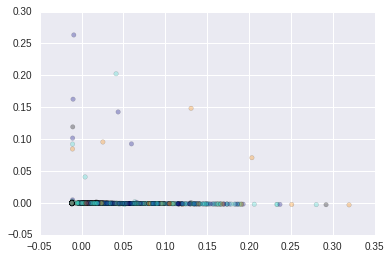

In [94]:
color = map(lambda x: 'navy' if x=='$' else 'turquoise' if x=='$$' else 'darkorange' if x=='$$$' else 'k', PCA_dollar3['price'])
plt.scatter(PCA_dollar3['x'].values, PCA_dollar3['y'].values, c=color, alpha= 0.3)
#xlim, ylim

In [ ]:
c_map = {'$':'navy','$$':'turquoise','$$':'darkorange'}
fig, ax = plt.subplots(1,1)
ax.scatter(PCA_dollar['x'], PCA_dollar['y'], c=[c_map[_] for _ in 3 ])